##  Import necessary libraries



In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
import warnings
import pickle
import os

##  Load the dataset

In [2]:
df_1 = pd.read_excel("/content/case_study1.xlsx") # Bank Internal Data
df_2 = pd.read_excel("/content/case_study2.xlsx") # Cibil Data

In [3]:
df1 = df_1.copy()
df2 = df_2.copy()



In [4]:
df1.sample(5)

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
10255,10256,1,0,1,0,0,0.00,0.0,1.0,0.0,...,0,0,0,0,0,0,1,1,262,262
9696,9697,1,0,1,0,0,0.00,0.0,1.0,0.0,...,0,1,0,0,0,0,1,0,9,9
49649,49650,4,0,4,2,0,0.50,0.0,1.0,0.0,...,0,2,0,0,0,1,3,2,13,3
30902,30903,1,0,1,0,0,0.00,0.0,1.0,0.0,...,0,0,0,0,0,1,0,0,12,12
21495,21496,4,0,4,1,0,0.25,0.0,1.0,0.0,...,0,2,0,0,0,2,2,2,19,6


In [5]:
df2.head()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1


In [6]:
print(df1.shape)
print(df2.shape)

(51336, 26)
(51336, 62)


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROSPECTID            51336 non-null  int64  
 1   Total_TL              51336 non-null  int64  
 2   Tot_Closed_TL         51336 non-null  int64  
 3   Tot_Active_TL         51336 non-null  int64  
 4   Total_TL_opened_L6M   51336 non-null  int64  
 5   Tot_TL_closed_L6M     51336 non-null  int64  
 6   pct_tl_open_L6M       51336 non-null  float64
 7   pct_tl_closed_L6M     51336 non-null  float64
 8   pct_active_tl         51336 non-null  float64
 9   pct_closed_tl         51336 non-null  float64
 10  Total_TL_opened_L12M  51336 non-null  int64  
 11  Tot_TL_closed_L12M    51336 non-null  int64  
 12  pct_tl_open_L12M      51336 non-null  float64
 13  pct_tl_closed_L12M    51336 non-null  float64
 14  Tot_Missed_Pmnt       51336 non-null  int64  
 15  Auto_TL            

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   time_since_recent_payment     51336 non-null  int64  
 2   time_since_first_deliquency   51336 non-null  int64  
 3   time_since_recent_deliquency  51336 non-null  int64  
 4   num_times_delinquent          51336 non-null  int64  
 5   max_delinquency_level         51336 non-null  int64  
 6   max_recent_level_of_deliq     51336 non-null  int64  
 7   num_deliq_6mts                51336 non-null  int64  
 8   num_deliq_12mts               51336 non-null  int64  
 9   num_deliq_6_12mts             51336 non-null  int64  
 10  max_deliq_6mts                51336 non-null  int64  
 11  max_deliq_12mts               51336 non-null  int64  
 12  num_times_30p_dpd             51336 non-null  int64  
 13  n

## Remove nulls

In [9]:
df1 = df1.loc[df1['Age_Oldest_TL'] != -99999]

In [10]:
columns_to_be_removed = []

for i in df2.columns:
    if df2.loc[df2[i] == -99999].shape[0] > 10000:
        columns_to_be_removed .append(i)


In [11]:
df2 = df2.drop(columns_to_be_removed, axis =1)

In [12]:
for i in df2.columns:
    df2 = df2.loc[ df2[i] != -99999 ]


In [13]:
print(df1.shape)
print(df2.shape)

(51296, 26)
(42066, 54)


In [14]:
# Checking common column names
for i in list(df1.columns):
    if i in list(df2.columns):
        print (i)



PROSPECTID


In [15]:
# Merge the two dataframes, inner join so that no nulls are present
df = pd. merge ( df1, df2, how ='inner', left_on = ['PROSPECTID'], right_on = ['PROSPECTID'] )


In [16]:
df.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,...,0.0,0.0,0.000,0.0,1,0,PL,PL,696,P2
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,...,0.0,0.0,0.000,0.0,1,0,ConsumerLoan,others,693,P2
3,5,3,2,1,0,0,0.000,0.0,0.333,0.667,...,0.0,0.0,0.000,0.0,0,0,AL,AL,753,P1
4,6,6,5,1,0,0,0.000,0.0,0.167,0.833,...,1.0,0.0,0.429,0.0,1,0,ConsumerLoan,PL,668,P3


In [17]:
df.describe()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_currentBal_all_TL,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,Credit_Score
count,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.00000,42064.000000,42064.000000,42064.000000,42064.000000,...,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000
mean,25649.827477,5.262980,2.967383,2.295597,0.812643,0.48992,0.179032,0.097783,0.577452,0.422548,...,0.883693,0.102962,0.193063,0.219169,0.074833,0.195497,0.064186,0.252235,0.056580,679.326336
std,14844.173396,7.463383,6.141098,2.404086,1.383559,1.05892,0.278043,0.210957,0.366110,0.366110,...,40.622275,0.303913,0.394707,0.395100,0.250658,0.367414,0.225989,0.434300,0.231042,21.133619
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,469.000000
25%,12776.750000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.286000,0.000000,...,0.152000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,668.000000
50%,25706.500000,3.000000,1.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.545000,0.455000,...,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,679.000000
75%,38518.250000,6.000000,3.000000,3.000000,1.000000,1.00000,0.333000,0.100000,1.000000,0.714000,...,0.860000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,690.000000
max,51336.000000,235.000000,216.000000,47.000000,27.000000,19.00000,1.000000,1.000000,1.000000,1.000000,...,6327.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,809.000000


In [18]:
# check how many columns are categorical
for i in df.columns:
    if df[i].dtype == 'object':
        print(i)



MARITALSTATUS
EDUCATION
GENDER
last_prod_enq2
first_prod_enq2
Approved_Flag


#  Chi-Square Test
The chi-square test is a statistical method used to determine whether there is a significant association between categorical variables

*Purpose*: To assess whether two categorical variables are independent of each other.

In [19]:
# Chi-square test
for i in ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']:
    chi2, pval, _, _ = chi2_contingency(pd.crosstab(df[i], df['Approved_Flag']))
    print(i, '---', pval)


MARITALSTATUS --- 3.578180861038862e-233
EDUCATION --- 2.6942265249737532e-30
GENDER --- 1.907936100186563e-05
last_prod_enq2 --- 0.0
first_prod_enq2 --- 7.84997610555419e-287


# *Since all the categorical features have pval <=0.05, we will accept all*

# VIF for numerical columns
The VIF test refers to the Variance Inflation Factor test, which is a measure used in statistics to assess multicollinearity in regression models.

1. **Purpose:** The VIF quantifies how much the variance of a regression coefficient is inflated due to multicollinearity. It helps identify whether there are high correlations between independent variables that could impact the reliability of the regression coefficients.

2. **Calculation:** The VIF for each independent variable is calculated as follows:

VIFi = 1/(1-Ri^2)
  Where Ri^2 is the R-squared value.
 3. **Interpretation:**
* VIF = 1: No correlation between the  i-th variable and the other variables.
* 1 < VIF < 5: Moderate correlation, but not severe enough to warrant concern.
* VIF ≥ 5 or 10: High correlation, indicating potential multicollinearity issues. Some practitioners use a threshold of 10 as a rule of thumb for serious multicollinearity.

In [20]:
# VIF for numerical columns
numeric_columns = []
for i in df.columns:
    if df[i].dtype != 'object' and i not in ['PROSPECTID','Approved_Flag']:
        numeric_columns.append(i)



In [21]:
# VIF sequentially check

vif_data = df[numeric_columns]
total_columns = vif_data.shape[1]
columns_to_be_kept = []
column_index = 0



In [22]:

for i in range (0,total_columns):

    vif_value = variance_inflation_factor(vif_data, column_index)
    print (column_index,'---',vif_value)


    if vif_value <= 6:
        columns_to_be_kept.append( numeric_columns[i] )
        column_index = column_index+1

    else:
        vif_data = vif_data.drop([ numeric_columns[i] ] , axis=1)



/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


0 --- inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


0 --- inf
0 --- 11.320180023967996
0 --- 8.363698035000336
0 --- 6.520647877790928
0 --- 5.149501618212625
1 --- 2.611111040579735


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


2 --- inf
2 --- 1788.7926256209232
2 --- 8.601028256477228
2 --- 3.832800792153077
3 --- 6.099653381646723
3 --- 5.581352009642766
4 --- 1.985584353098778


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


5 --- inf
5 --- 4.80953830281934
6 --- 23.270628983464636
6 --- 30.595522588100053
6 --- 4.384346405965583
7 --- 3.0646584155234238
8 --- 2.898639771299251
9 --- 4.377876915347324
10 --- 2.207853583695844
11 --- 4.916914200506864
12 --- 5.214702030064725
13 --- 3.3861625024231476
14 --- 7.840583309478997
14 --- 5.255034641721434


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


15 --- inf
15 --- 7.380634506427238
15 --- 1.4210050015175733
16 --- 8.083255010190316
16 --- 1.6241227524040114
17 --- 7.257811920140003
17 --- 15.59624383268298
17 --- 1.825857047132431
18 --- 1.5080839450032664
19 --- 2.172088834824578
20 --- 2.6233975535272274
21 --- 2.2959970812106176
22 --- 7.360578319196446
22 --- 2.1602387773102567
23 --- 2.8686288267891467
24 --- 6.458218003637272
24 --- 2.8474118865638247
25 --- 4.753198156284083
26 --- 16.22735475594825
26 --- 6.424377256363877
26 --- 8.887080381808678
26 --- 2.3804746142952653
27 --- 8.60951347651454
27 --- 13.06755093547673
27 --- 3.500040056654653
28 --- 1.9087955874813773
29 --- 17.006562234161628
29 --- 10.730485153719197
29 --- 2.3538497522950275
30 --- 22.10485591513649
30 --- 2.7971639638512924
31 --- 3.424171203217696
32 --- 10.175021454450922
32 --- 6.408710354561292
32 --- 1.001151196262563
33 --- 3.069197305397273
34 --- 2.8091261600643724
35 --- 20.249538381980678
35 --- 15.864576541593774
35 --- 1.8331649740532

In [28]:
# check Anova for columns_to_be_kept

from scipy.stats import f_oneway

columns_to_be_kept_numerical = []

for i in columns_to_be_kept:
    a = list(df[i])
    b = list(df['Approved_Flag'])

    group_P1 = [value for value, group in zip(a, b) if group == 'P1']
    group_P2 = [value for value, group in zip(a, b) if group == 'P2']
    group_P3 = [value for value, group in zip(a, b) if group == 'P3']
    group_P4 = [value for value, group in zip(a, b) if group == 'P4']


    f_statistic, p_value = f_oneway(group_P1, group_P2, group_P3, group_P4)

    if p_value <= 0.05:
        columns_to_be_kept_numerical.append(i)

In [29]:
# listing all the final features
features = columns_to_be_kept_numerical + ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']
df = df[features + ['Approved_Flag']]
print(features)
len(features)

['pct_tl_open_L6M', 'pct_tl_closed_L6M', 'Tot_TL_closed_L12M', 'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'CC_TL', 'Home_TL', 'PL_TL', 'Secured_TL', 'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL', 'time_since_recent_payment', 'max_recent_level_of_deliq', 'num_deliq_6_12mts', 'num_times_60p_dpd', 'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt', 'num_dbt_12mts', 'num_lss', 'recent_level_of_deliq', 'CC_enq_L12m', 'PL_enq_L12m', 'time_since_recent_enq', 'enq_L3m', 'NETMONTHLYINCOME', 'Time_With_Curr_Empr', 'CC_Flag', 'PL_Flag', 'pct_PL_enq_L6m_of_ever', 'pct_CC_enq_L6m_of_ever', 'HL_Flag', 'GL_Flag', 'MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']


42

In [30]:
df.shape

(42064, 43)

In [31]:
df.sample(5)

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,...,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,MARITALSTATUS,EDUCATION,GENDER,last_prod_enq2,first_prod_enq2,Approved_Flag
40999,0.000,0.0,1,0.067,0,0,0,0,9,6,...,0.0,0.0,1,0,Married,OTHERS,M,others,others,P2
27697,0.500,0.5,1,0.500,1,0,0,0,0,2,...,0.0,0.0,0,0,Married,12TH,M,ConsumerLoan,ConsumerLoan,P2
7351,0.143,0.0,0,0.000,1,0,0,0,5,2,...,0.0,0.0,0,0,Single,GRADUATE,M,others,others,P1
35360,0.200,0.0,0,0.000,0,0,1,0,5,0,...,0.0,0.0,1,1,Married,SSC,M,others,others,P2
960,1.000,0.0,0,0.000,0,0,0,0,0,1,...,0.5,0.0,0,0,Married,12TH,M,ConsumerLoan,HL,P3


# Graph


<ipython-input-32-9f4cfa56a4a1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


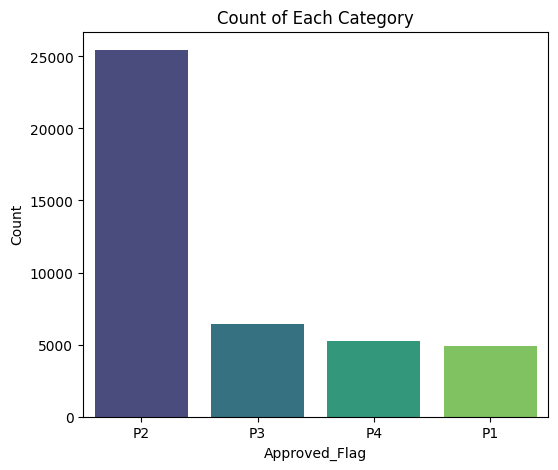

In [32]:
# Count the occurrences of each category
category_counts = df['Approved_Flag'].value_counts()
# Plot
plt.figure(figsize=(6, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xlabel('Approved_Flag')
plt.ylabel('Count')
plt.title('Count of Each Category')
plt.show()

<ipython-input-33-b3e18a903f25>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


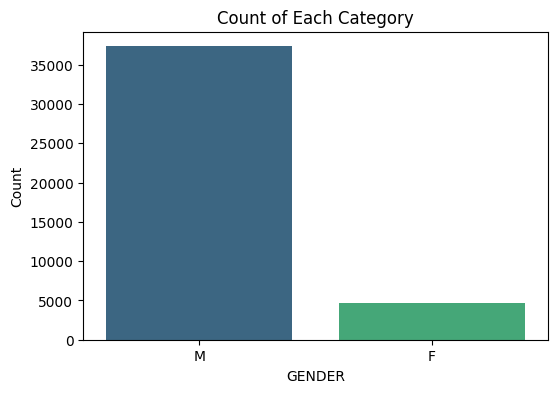

In [33]:
# Count the occurrences of each category
category_counts = df['GENDER'].value_counts()
# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xlabel('GENDER')
plt.ylabel('Count')
plt.title('Count of Each Category')
plt.show()

<ipython-input-34-346eaf0ddb48>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


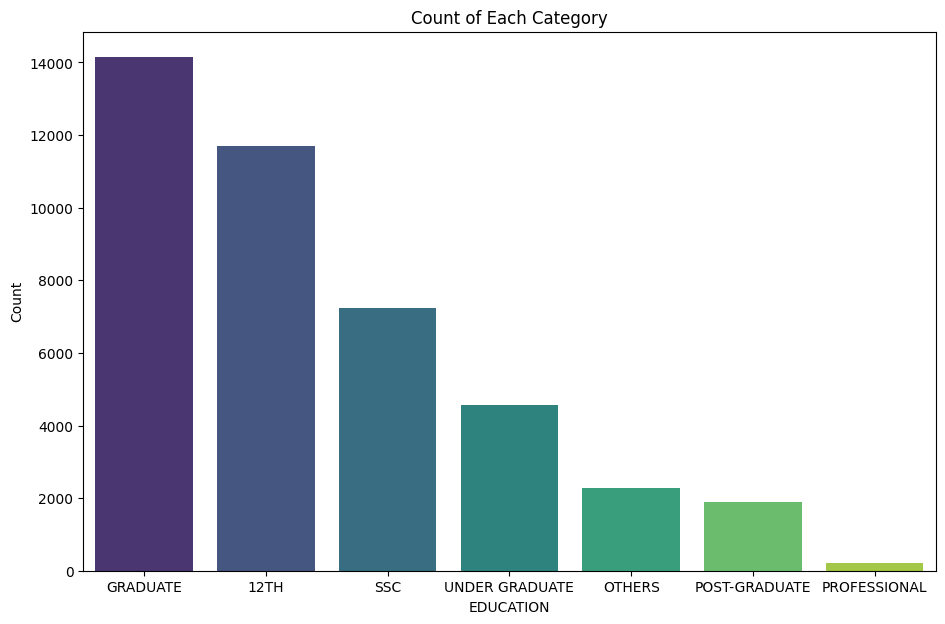

In [34]:
# Count the occurrences of each category
category_counts = df['EDUCATION'].value_counts()
# Plot
plt.figure(figsize=(11, 7))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xlabel('EDUCATION')
plt.ylabel('Count')
plt.title('Count of Each Category')
plt.show()

<ipython-input-35-e74aecbf7d19>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


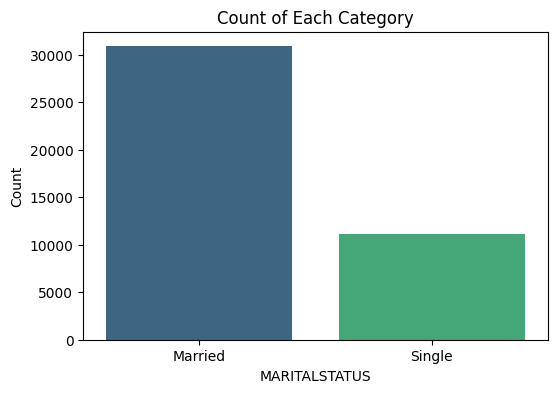

In [35]:
# Count the occurrences of each category
category_counts = df['MARITALSTATUS'].value_counts()
# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xlabel('MARITALSTATUS')
plt.ylabel('Count')
plt.title('Count of Each Category')
plt.show()

In [36]:
df.columns

Index(['pct_tl_open_L6M', 'pct_tl_closed_L6M', 'Tot_TL_closed_L12M',
       'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'CC_TL', 'Home_TL', 'PL_TL',
       'Secured_TL', 'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL',
       'Age_Newest_TL', 'time_since_recent_payment',
       'max_recent_level_of_deliq', 'num_deliq_6_12mts', 'num_times_60p_dpd',
       'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt',
       'num_dbt_12mts', 'num_lss', 'recent_level_of_deliq', 'CC_enq_L12m',
       'PL_enq_L12m', 'time_since_recent_enq', 'enq_L3m', 'NETMONTHLYINCOME',
       'Time_With_Curr_Empr', 'CC_Flag', 'PL_Flag', 'pct_PL_enq_L6m_of_ever',
       'pct_CC_enq_L6m_of_ever', 'HL_Flag', 'GL_Flag', 'MARITALSTATUS',
       'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2',
       'Approved_Flag'],
      dtype='object')

In [37]:
df['first_prod_enq2'].value_counts()

first_prod_enq2
others          20640
ConsumerLoan    11075
PL               4431
AL               2641
CC               1988
HL               1289
Name: count, dtype: int64

In [38]:
df['last_prod_enq2'].value_counts()

last_prod_enq2
ConsumerLoan    16480
others          13653
PL               7553
CC               2195
AL               1353
HL                830
Name: count, dtype: int64

In [39]:
# Label encoding for the categorical features
#['MARITALSTATUS', 'EDUCATION', 'GENDER' , 'last_prod_enq2' ,'first_prod_enq2']
df['MARITALSTATUS'].unique()
df['EDUCATION'].unique()
df['GENDER'].unique()
df['last_prod_enq2'].unique()
df['first_prod_enq2'].unique()

array(['PL', 'ConsumerLoan', 'others', 'AL', 'HL', 'CC'], dtype=object)

* Ordinal feature -- EDUCATION
* SSC            : 1
* 12TH           : 2
* GRADUATE       : 3
* UNDER GRADUATE : 3
* POST-GRADUATE  : 4
* OTHERS         : 1
* PROFESSIONAL   : 3

In [40]:
df.loc[df['EDUCATION'] == 'SSC',['EDUCATION']]              = 1
df.loc[df['EDUCATION'] == '12TH',['EDUCATION']]             = 2
df.loc[df['EDUCATION'] == 'GRADUATE',['EDUCATION']]         = 3
df.loc[df['EDUCATION'] == 'UNDER GRADUATE',['EDUCATION']]   = 3
df.loc[df['EDUCATION'] == 'POST-GRADUATE',['EDUCATION']]    = 4
df.loc[df['EDUCATION'] == 'OTHERS',['EDUCATION']]           = 1
df.loc[df['EDUCATION'] == 'PROFESSIONAL',['EDUCATION']]     = 3
df['EDUCATION'].value_counts()
df['EDUCATION'] = df['EDUCATION'].astype(int)


<ipython-input-40-b4a3cf6aea1a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EDUCATION'] = df['EDUCATION'].astype(int)


In [41]:
df_encoded = pd.get_dummies(df, columns=['MARITALSTATUS','GENDER', 'last_prod_enq2' ,'first_prod_enq2'])

In [42]:
 df_encoded.describe()

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,...,enq_L3m,NETMONTHLYINCOME,Time_With_Curr_Empr,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,EDUCATION
count,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,...,42064.000000,4.206400e+04,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000
mean,0.179032,0.097783,0.825504,0.160365,0.525746,0.145921,0.076241,0.328000,2.921334,2.341646,...,1.230458,2.692990e+04,110.345783,0.102962,0.193063,0.195497,0.064186,0.252235,0.056580,2.313689
std,0.278043,0.210957,1.537208,0.258831,1.106442,0.549314,0.358582,0.916368,6.379764,3.405397,...,2.069461,2.084300e+04,75.629967,0.303913,0.394707,0.367414,0.225989,0.434300,0.231042,0.871070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.800000e+04,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,2.400000e+04,92.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,0.333000,0.100000,1.000000,0.250000,1.000000,0.000000,0.000000,0.000000,3.000000,3.000000,...,2.000000,3.100000e+04,131.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000
max,1.000000,1.000000,33.000000,1.000000,34.000000,27.000000,10.000000,29.000000,235.000000,55.000000,...,42.000000,2.500000e+06,1020.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


## Machine Learing model fitting
## Data processing


In [43]:
# 1. Random Forest

y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators = 200, random_state=42)
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)



accuracy = accuracy_score(y_test, y_pred)
print ()
print(f'Accuracy: {accuracy}')
print ()
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)


for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()


Accuracy: 0.7636990372043266

Class p1:
Precision: 0.8370457209847597
Recall: 0.7041420118343196
F1 Score: 0.7648634172469203

Class p2:
Precision: 0.7957519116397621
Recall: 0.9282457879088206
F1 Score: 0.8569075937785909

Class p3:
Precision: 0.4423380726698262
Recall: 0.21132075471698114
F1 Score: 0.28600612870275793

Class p4:
Precision: 0.7178502879078695
Recall: 0.7269193391642371
F1 Score: 0.7223563495895703



In [44]:
# 2. xgboost

import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

xgb_classifier = xgb.XGBClassifier(objective='multi:softmax',  num_class=4)



y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)




xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print ()
print(f'Accuracy: {accuracy:.2f}')
print ()

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()





Accuracy: 0.78

Class p1:
Precision: 0.823906083244397
Recall: 0.7613412228796844
F1 Score: 0.7913890312660173

Class p2:
Precision: 0.8255418233924413
Recall: 0.913577799801784
F1 Score: 0.8673315769665036

Class p3:
Precision: 0.4756380510440835
Recall: 0.30943396226415093
F1 Score: 0.3749428440786465

Class p4:
Precision: 0.7342386032977691
Recall: 0.7356656948493683
F1 Score: 0.7349514563106796



In [46]:
# 3. Decision Tree
from sklearn.tree import DecisionTreeClassifier


y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


dt_model = DecisionTreeClassifier(max_depth=20, min_samples_split=10)
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print ()
print(f"Accuracy: {accuracy:.2f}")
print ()

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()




Accuracy: 0.71

Class p1:
Precision: 0.7198443579766537
Recall: 0.7297830374753451
F1 Score: 0.7247796278158668

Class p2:
Precision: 0.8093476144109055
Recall: 0.8237859266600595
F1 Score: 0.8165029469548134

Class p3:
Precision: 0.34469096671949284
Recall: 0.3283018867924528
F1 Score: 0.3362968689601855

Class p4:
Precision: 0.6508097165991903
Recall: 0.6248785228377065
F1 Score: 0.6375805651958355



# xgboost is giving me best results

In [47]:
# Apply standard scaler

from sklearn.preprocessing import StandardScaler

columns_to_be_scaled = ['Age_Oldest_TL','Age_Newest_TL','time_since_recent_payment',
'max_recent_level_of_deliq','recent_level_of_deliq',
'time_since_recent_enq','NETMONTHLYINCOME','Time_With_Curr_Empr']

for i in columns_to_be_scaled:
    column_data = df_encoded[i].values.reshape(-1, 1)
    scaler = StandardScaler()
    scaled_column = scaler.fit_transform(column_data)
    df_encoded[i] = scaled_column

In [48]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

xgb_classifier = xgb.XGBClassifier(objective='multi:softmax',  num_class=4)



y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)




xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()






Accuracy: 0.78
Class p1:
Precision: 0.823906083244397
Recall: 0.7613412228796844
F1 Score: 0.7913890312660173

Class p2:
Precision: 0.8255418233924413
Recall: 0.913577799801784
F1 Score: 0.8673315769665036

Class p3:
Precision: 0.4756380510440835
Recall: 0.30943396226415093
F1 Score: 0.3749428440786465

Class p4:
Precision: 0.7342386032977691
Recall: 0.7356656948493683
F1 Score: 0.7349514563106796



# **No improvement in metrices**

# Hyperparameter tuning in xgboost

In [49]:
from sklearn.model_selection import GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

# Define the XGBClassifier with the initial set of hyperparameters
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=4)

 * Grid Search

In [50]:
# Define the parameter grid for hyperparameter tuning

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=4,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [51]:
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


In [52]:
# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(x_test, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.7811719957209081


In [56]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [58]:
folder_path = "/content/drive/MyDrive/Colab Notebooks"
# Define the full file path for saving the model
model_path = os.path.join(folder_path, 'best_model.pkl')


In [59]:
# Save the model using pickle
with open(model_path, 'wb') as file:
    pickle.dump(best_model, file)

<Figure size 5000x4000 with 0 Axes>

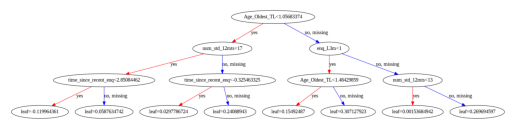

In [64]:
# Define the full file path for saving the model image
image_path = os.path.join(folder_path, 'best_model.png')

# Plot the tree
plt.figure(figsize=(50, 40))
xgb.plot_tree(best_model, num_trees=0)
plt.savefig(image_path)

In [66]:
with open('/content/drive/MyDrive/Colab Notebooks/best_model.pkl', 'rb') as file:
    load_model = pickle.load(file)


In [78]:
load_model.predict(x_train)

array([1, 0, 1, ..., 1, 3, 0], dtype=int32)